### **Pandas Dataframes**
Pandas stands for "Panel Data", where "panel" basically means *table* or *spreadsheet*,  
that is, data arranged in rows and columns.  
- In Pandas, this spreadsheet-like data structure is called a **dataframe**.
- Unlike a spreadsheet, such as an Excel worksheet, a Pandas dataframe exists as a *variable*.  
- A dataframe is a two-dimensional **matrix** of rows and columns, having a **shape** property,  
 as a **tuple**. A 10-row x 4-column dataframe has a shape of (10, 4)
- A single row or column of a dataframe exists as a one-dimensional vector, called a **Series**.
- Numpy terms such as shape, dimensions, matrix, vector and tuple apply to dataframes, too,  
because Pandas is built on top of Numpy.  
- Like Numpy, Pandas must be imported.

In this lesson, we will learn how to:
- make a Pandas dataframe from multiple lists, one list per column
- make a Pandas dataframe from a dictionary, where each key value is a list
- select ranges of dataframe rows and/or columns by index number
- select ranges of dataframe rows and/or columns by column name
- use **loc** and **iloc** syntax to select data
- filter data based on a condition
- filter data based on multiple conditions
- add rows of data to an existing dataframe
- add columns to an existing dataframe
- get / set individual values from a dataframe
- make a Pandas Series (1D data structure) from a 2D Dataframe
- use **list()** and **tolist()** methods to convert a Numpy array or Panda Series to a list

**Pandas DataFrame**: two-dimensional data structure, consising of rows and columns.

- Dataframes are often made from loaded data, such as from a **CSV** file,  
but they can be made from lists, arrays or dictionaries, which is how we will start.
- **DataFrame()** method returns a dataframe
- if provided no arguments, DataFrame() returns a new, empty dataframe
- DataFrame() can takes a 2D array or a dictionary as its argument,  
in which case it returns a dataframe with data already in it

In [ ]:
# if import pandas doesn't work:
# %pip install pandas
# %pip install IPython.display
# ON LOCAL MACHINE (e.g. VSCode NOT Google Colab)
# You MAY need to INSTALL -- NOT just IMPORT numpy and/or pandas
# Which MAY result in ERROR, which can be troubleshot as follows:
# if installing pandas doesn't work
# uninstall numpy and pandas and then
# FORCE reinstall both, clearing all cache:
# %pip uninstall -y numpy pandas
# %pip install numpy pandas --no-cache-dir --force-reinstall

In [22]:
# 0. import modules:
import numpy as np
import pandas as pd
import random
import pprint as pp
from IPython.display import Image

In [9]:
# 1. make a numpy array of consecutive integers from 21-84;
nums_arr = np.arange(21,85)
print(nums_arr.shape) # (64,)
print(nums_arr.ndim)
print(nums_arr)

(64,)
1
[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84]


In [63]:
# reshape (64,) vector into (8,8) matrix
nums_8x8_arr = nums_arr.reshape(8,8)
print(nums_8x8_arr.shape) # (8,8)
print(nums_8x8_arr.ndim)
print(nums_8x8_arr)

(8, 8)
2
[[21 22 23 24 25 26 27 28]
 [29 30 31 32 33 34 35 36]
 [37 38 39 40 41 42 43 44]
 [45 46 47 48 49 50 51 52]
 [53 54 55 56 57 58 59 60]
 [61 62 63 64 65 66 67 68]
 [69 70 71 72 73 74 75 76]
 [77 78 79 80 81 82 83 84]]


In [68]:
# get a single row or col from 8x8 numpy arr:
# first_row
print(nums_8x8_arr[0]) # notice NO cols mentioned
# index [0] is [21 22 23 24 25 26 27 28], so you get THAT
print()
print('first row:')
print(nums_8x8_arr[0,:]) # you CAN specify all cols (optional)
print('first col:')
# get col 0 (first col, all rows)
print(nums_8x8_arr[:,0])

print('last row:')
print(nums_8x8_arr[-1])
print(nums_8x8_arr[-1,:])
print('last col:')
print(nums_8x8_arr[:,-1])
# challenge: get first/last row/col from chess_df

[21 22 23 24 25 26 27 28]

first row:
[21 22 23 24 25 26 27 28]
first col:
[21 29 37 45 53 61 69 77]
last row:
[77 78 79 80 81 82 83 84]
[77 78 79 80 81 82 83 84]
last col:
[28 36 44 52 60 68 76 84]


In [16]:
# select tic-tac-toe 3x3, upper left corner from numpy array 8x8
ttt_ul = nums_8x8_arr[0:3,0:3]
print(ttt_ul)

[[21 22 23]
 [29 30 31]
 [37 38 39]]


In [10]:
# 3. Make a Pandas DataFrame from the chessboard array:
chessboard_df = pd.DataFrame(nums_8x8_arr)
print(chessboard_df.shape) # (8,8)
chessboard_df

(8, 8)


,0,1,2,3,4,5,6,7
0,21,22,23,24,25,26,27,28
1,29,30,31,32,33,34,35,36
2,37,38,39,40,41,42,43,44
3,45,46,47,48,49,50,51,52
4,53,54,55,56,57,58,59,60
5,61,62,63,64,65,66,67,68
6,69,70,71,72,73,74,75,76
7,77,78,79,80,81,82,83,84


In [21]:
chessboard_df.iloc[0:3,0:3]

,0,1,2
0,21,22,23
1,29,30,31
2,37,38,39


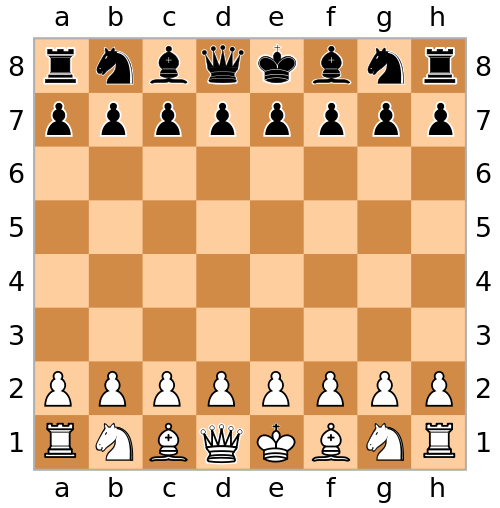

In [26]:
Image("https://static.guides.co/a/uploads/1194%2F500px-Chess_board_blank.svg.png", width=250)

In [56]:
# challenge: make this list w code: [8,7,6,5,4,3,2,1]
row_names = list(range(1, 9))[::-1]

print(row_names)
# chessheader = list(range(1, 9))[::-1]
# print(chessheader)
# chessheader_list = list(range(1, 9))
# chessheader_list.reverse()
rows = list(reversed((range(1,9))))
print(rows)
# print(chessheader_list)
# stringy version of row names:
row_names_str = list(map(str, rows))
print(row_names_str)
x = 5
x_str = str(x)
print(type(x_str), x)

[8, 7, 6, 5, 4, 3, 2, 1]
[8, 7, 6, 5, 4, 3, 2, 1]
['8', '7', '6', '5', '4', '3', '2', '1']
<class 'str'> 5


In [50]:
# 5. Make the chessboard df again, but this time
#.   supply column headers as letters from a-h
#    also, number the rows from 1-8 in descending order
col_names = ['a','b','c','d','e','f','g','h']
chess_df = pd.DataFrame(nums_8x8_arr,
                        columns=col_names,
                        index=row_names_str)

In [79]:
# 6. Output the df, now w col headers:
print(chess_df.shape, chess_df.ndim)
print(type(chess_df)) # <class 'pandas.core.frame.DataFrame'>
chess_df

(8, 8) 2
<class 'pandas.core.frame.DataFrame'>


,a,b,c,d,e,f,g,h
8,21,22,23,24,25,26,27,28
7,29,30,31,32,33,34,35,36
6,37,38,39,40,41,42,43,44
5,45,46,47,48,49,50,51,52
4,53,54,55,56,57,58,59,60
3,61,62,63,64,65,66,67,68
2,69,70,71,72,73,74,75,76
1,77,78,79,80,81,82,83,84


In [87]:
# get first row from df:
first_row = chess_df.iloc[0]
print(first_row.shape, first_row.ndim) # (8,)
print(type(first_row)) # <class 'pandas.core.series.Series'>
print(first_row)
first_row_dict = dict(first_row)
print(type(first_row_dict))
pp.pprint(first_row_dict)

(8,) 1
<class 'pandas.core.series.Series'>
a    21
b    22
c    23
d    24
e    25
f    26
g    27
h    28
Name: 8, dtype: int64
<class 'dict'>
{'a': np.int64(21),
 'b': np.int64(22),
 'c': np.int64(23),
 'd': np.int64(24),
 'e': np.int64(25),
 'f': np.int64(26),
 'g': np.int64(27),
 'h': np.int64(28)}


In [85]:
# get first row again BUT as a 2D DataFrame of shape (1,8)
# NOT as a 1D Series of shape (8,) -- which is what we have previously
first_row_df = chess_df.iloc[[0]]

In [86]:
print(first_row_df.shape, first_row_df.ndim)
print(type(first_row_df)) # <class 'pandas.core.frame.DataFrame'>
first_row_df

(1, 8) 2
<class 'pandas.core.frame.DataFrame'>


,a,b,c,d,e,f,g,h
8,21,22,23,24,25,26,27,28


In [ ]:
# get first col from df:

In [ ]:
# get last row from df:

In [ ]:
# get last col from df:

In [52]:
# get the ttt board 3x3 from the chess_df
# refer to row col NAMES not INDEX
# the row / col name is INCLUSIVE in selections
chess_df.loc['8':'6','a':'c']

,a,b,c
8,21,22,23
7,29,30,31
6,37,38,39


#### **string module**.
```python
import string
```
The string module is for dynamically generating sequences of letters and digits:

string.ascii_uppercase → 'abcdefghijklmnopqrstuvwxyz'

string.ascii_lowercase → 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

string.ascii_letters → lowercase + uppercase (ascii_lowercase + ascii_uppercase)

string.digits → '0123456789'

In [ ]:
# 7. Make the chessboard df again, but this time
#.   supply column headers as letters from a-h dynamically
#.   using the string.lower_case (or string.letters)


### **df.iloc[row_index,col_index]**  
gets a dataframe row as **series**.  
The single square brackets indicate a 1D selection
**iloc** stands for *integer location*

In [54]:
# get a SINGLE value out of the DF:
# use .iloc then again same thing w .loc
d5 = chess_df.iloc[3,3]
print('d5:',d5)
# .loc version of the above, use row/col NAMES not INDEX
d5 = chess_df.loc['5','d']
print('d5:',d5)

d5: 48
d5: 48


In [ ]:
# 8 Get the first row as a Series (1D vector)

print() # (8,) 1
print()
print()
print()


In [ ]:
# 9. Get the first row as its own DataFrame (matrix 2D): df.iloc[row_index,col_index]

print() # (1, 8) 2


In [ ]:
# 10. Get the last row as its own df: df.iloc[row_index,col_index]

print() # (1, 8)


In [ ]:
# 11. Make new df of middle 4 rows (all cols)
# so, all but first and last 2 rows:
# df.iloc[row_start_index:row_end_index_excl,start_col_index:end_col_index_excl]
# [row_range,:] means row range, all columns
# [:,col_range] means all rows, col range

print() # (4, 8)



In [ ]:
# 12. Challenge: Make new df of middle 4 rows middle 4 cols

print() # (4,4) 2



In [ ]:
# 13. Challenge: make a new df called ttt_ur_df
# as tic-tac-toe board using upper right 3x3 corner of the chessboard
# chessboard_df.iloc[first_3_rows,last_3_cols]


In [ ]:
# 14. Make a DF of every other row using step (2)


In [ ]:
# 15. Challenge: Make a DF of every other row AND every other col?
# 4x4 : rows: 8,6,4,2 cols: a c e g
# ever


In [ ]:
# 16. Set the middle 4 rows, all squares, to empty spaces
# (like a chessboard at start of game)


In [ ]:
# che

In [ ]:
# 17. Set the pawn rows to "P"
# (like a chessboard at start of game)
# for rows that are not contiguous (not consecutive)
# specify rows as a list, in this case [1,6]
# che

In [ ]:
# che

In [ ]:
# 18. Set the 4 corners to "R" (for rook)
# (like a chessboard at start of game)
# che

In [ ]:
# 19. Set the Knights, as "Kn", next to each rook
# (like a chessboard at start of game)
# che


In [ ]:
# 20. Clallenge: set the Bishops, as "B", next to each Knight
# (like a chessboard at start of game)
# che

In [ ]:
# 21. Clallenge: set the Kings and Queens to "K" and "Q":
# che

**Starting with a new, empty DataFrame**.  

- You can make a new, empty dataframe, and then assign the data after the fact.
- The data can be assigned as lists, one per column.
- The list length results in that many rows in the dataframe.
- To avoid ragged rows problem, make sure all lists are of equal length

In [117]:
# 22. Using the provided raw data, declare 4 lists of 4 items each
food = ["T-Bone Steak","Pizza","Hamburger","Garden Salad"]
prices = [49.99, 19.99, 15.75, 12.99]
calories = [700, 500, 600, 350]
vegan = [False, False, False, True]

In [118]:
# 23. Declare a new empty dataframe
food_df = pd.DataFrame()

In [119]:
# 24. Declare columns for the DF, to do so, put df["new col"] and assign list; length of lists must all be equal and must equal number of rows
food_df["Item"] = food
# make the other 3 cols as "Price", "Cals", "Vegan"
# assign each new col its respective list
food_df["Price"] = prices
food_df["Cals"] = calories
food_df["Vegan"] = vegan

In [120]:
print(food_df.shape) # (r,c) (4,1)
food_df

(4, 4)


,Item,Price,Cals,Vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,500,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True


In [123]:
# 25. Challenge: get the pizza row -- the result is a 1D Series
pizza_series = food_df.iloc[1]

print(pizza_series.shape, pizza_series.ndim) # (4,) 1
print(pizza_series)

# make a list from the series -- this purges the col names, leaving just the values
pizza_list = list(pizza_series)
print(pizza_list) # ['Pizza', 19.99, 500, False]

# make a dict from the series -- this uses the col names as the keys
piza_dict = dict(pizza_series)
print(piza_dict) # {'Item': 'Pizza', 'Price': 19.99, 'Cals': 500, 'Vegan': False}

(4,) 1
Item     Pizza
Price    19.99
Cals       500
Vegan    False
Name: 1, dtype: object
['Pizza', np.float64(19.99), np.int64(500), np.False_]
{'Item': 'Pizza', 'Price': np.float64(19.99), 'Cals': np.int64(500), 'Vegan': np.False_}


### **df.iloc[[num]]**  
- To get a dataframe slice as a 2D dataframe--not just as a 1D series--use iloc with double square brackets.  
- The **[ [ num ] ]** indicate a 2D selection

In [124]:
# 26. Get the pizza row using .iloc -- BUT as a 2D DataFrame (1,4)
# the way to go from series to df is to use double [[]]
pizza_df = food_df.iloc[[1]]
# this way also works
print(pizza_df.shape, pizza_df.ndim) # (1,4) 2
pizza_df

(1, 4) 2


,Item,Price,Cals,Vegan
1,Pizza,19.99,500,False


### **df.iloc[row,col]**
To get an individual piece of data, look it up by row and column as you would in a Numpy array

In [126]:
# 27. Get the word 'Pizza' using .loc
print(food_df.iloc[1,0])

Pizza


### **df.loc[row_name,col_name]** for selecting by names, rather than index numbers
- **loc** stands for *location*
- if the row names are the same as row index, use index number for rows
- **iloc** range end index is exclusive, but with **loc** it's inclusive:
  - **iloc** rows are 0:3 to get rows 0,1,2
  - **loc** rows are 0:2 to get rows 0,1,2

In [127]:
#  get just the word 'Pizza' again BUT using .loc (col NAME)
print(food_df.loc[1,'Item'])

Pizza


In [128]:
# 28. Using .iloc, get the first 3 rows and first 3 cols of food_df:
# (all cols except vegan, all but last row)
food_df.iloc[0:3,0:3]

,Item,Price,Cals
0,T-Bone Steak,49.99,700
1,Pizza,19.99,500
2,Hamburger,15.75,600


In [129]:
# 29. Exact same thing as above BUT using loc:
# get the first 3 rows, first 3 cols
# iloc is exclusive, but loc is inclusive, so just go to row 2
food_df.loc[0:2,'Item':'Cals']

,Item,Price,Cals
0,T-Bone Steak,49.99,700
1,Pizza,19.99,500
2,Hamburger,15.75,600


In [ ]:
# 30. Using .iloc on food_df, get first 2 rows, first 2 cols
# fo

In [ ]:
# 31. Do the .loc version of the above (first 2 rows, first 2 cols)
# fo

**selecting non-contiguous rows and non-contiguous columns**  
- **df.iloc[[row_index,row_index],[col_index,col_index]]**
- **df.loc[[row_name,row_name],[col_name,col_name]]**
- pass in lists of row and column indexes

In [130]:
# 32. Using loc get first 2 rows, but non-contiguous cols: "Item" and "Cals"
food_df.loc[0:1, ["Item", "Cals"]]

,Item,Cals
0,T-Bone Steak,700
1,Pizza,500


In [131]:
# 33. Using iloc get first 2 rows, but non-contiguous cols: "Item" and "Cals"
food_df.iloc[0:2, [0, 2]]

,Item,Cals
0,T-Bone Steak,700
1,Pizza,500


In [132]:
# 34. Using loc get non-contiguous first and last rows, "Item" and "Cals" cols
food_df.loc[[0,3], ["Item", "Cals"]]

,Item,Cals
0,T-Bone Steak,700
3,Garden Salad,350


In [134]:
# 35. Using iloc get non-contiguous first and last rows, "Item" and "Cals" cols
food_df.iloc[[0,3], [0,2]]

,Item,Cals
0,T-Bone Steak,700
3,Garden Salad,350


### **Selecting DataFrame rows by column value condition**

**new_df = df[ df['col_name'] boolean_condition ]**
- to select only rows where a specific column values meets a condition,  
put the column and condition inside square brackets
- the condition is expressed as a **boolean comparison (==, <, >, <=, >=, !=)**
- every row where the column boolean comparison is **True** is included in the result

In [135]:
# 36. Get all food_df rows of 500 cals or less
food_df[ food_df['Cals'] <= 500 ]

,Item,Price,Cals,Vegan
1,Pizza,19.99,500,False
3,Garden Salad,12.99,350,True


In [ ]:
# 37. Get only non-vegan food items:
food_df[ food_df["Vegan"] == False ]

In [139]:
# 38. Use ~ tilda in front of ~df["col_name"] condition
# to get all rows where the condtion is False
# get all NON-Vegan rows:
food_df[ ~food_df["Vegan"] ]

,Item,Price,Cals,Vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,500,False
2,Hamburger,15.75,600,False


In [ ]:
# get all the vegan rows:
food_df[ food_df["Vegan"] == True ]

In [138]:
# evaluating the condition returns a boolean:
# == returns True or False
# BUT the value itself, being a bool, is already True or False
# SO you can just put the value, no ==
food_df[ food_df["Vegan"] ]

,Item,Price,Cals,Vegan
3,Garden Salad,12.99,350,True


**adding a new row to a dataframe**
- **df.loc[num]** for location indicates a row number
- specify the new next row number and set it equal to a list of values, one per column

In [141]:
# 39. Make a new_item list to add to the food_df
new_item = ["Fruit Salad", 13.50, 320, True]

In [142]:
# 40. Add the new item to the end of the food_df
food_df.loc[4] = new_item

In [143]:
food_df

,Item,Price,Cals,Vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,500,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True


In [146]:
# 41. Add Bison Burger to the df at next available row position
bison_item = ["Bison Burger", 18.50, 820, False]
print(bison_item)
food_df.loc[5] = bison_item
food_df

['Bison Burger', 18.5, 820, False]


,Item,Price,Cals,Vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,500,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,18.50,820,False


In [149]:
# 42. Increase the new item price by $1 with += operator:
food_df.loc[5,'Price'] += 1

In [150]:
food_df

,Item,Price,Cals,Vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,500,False
2,Hamburger,15.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False


#### **hard-coding row num vs dynamically getting num by condition:**
```python
# hard-coding row num 2 works, BUT how did you know the row num?
food_df.loc[2,'Price'] += 1
# Better to look up the row num; do this as boolean condition:
# get the row where the item name is 'Hamburger' -- that's it!
food_df.loc[food_df['Item']=='Hamburger','Price'] += 1
```

In [151]:
# increase Hamburger by $1 BUT without hard-coding row num (2)
food_df.loc[food_df['Item']=='Hamburger','Price'] += 1

In [ ]:
food_df

In [154]:
# 43. challenge: Increase the Pizza calories by 10% (from 500 to 550)
# BONUS: Look up the Pizza--don't hard-code row 1
food_df.loc[food_df['Item']=='Pizza', 'Cals'] *= 1.1

In [155]:
food_df

,Item,Price,Cals,Vegan
0,T-Bone Steak,49.99,700,False
1,Pizza,19.99,550,False
2,Hamburger,16.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False


In [157]:
# 44. challenge: Change 'T-Bone Steak' to "Ribeye Steak"
# BONUS: Don't hard-code row 0 -- look up the 'T-Bone Steak'
food_df.loc[food_df['Item']=='T-Bone Steak', 'Item'] = "Ribeye Steak"

In [158]:
food_df

,Item,Price,Cals,Vegan
0,Ribeye Steak,49.99,700,False
1,Pizza,19.99,550,False
2,Hamburger,16.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False


**len(df)** returns the number of rows in a dataframe.  
- **len(df)** is more dynamic than hard-coding the row number
- row indexing starts at 0, so the length of the df equals the next row index

In [159]:
# 45. Add a new row to the food_df by dynamically using len(food_df)
print('num rows:')
new_item = ["Caesar Salad", 14.75, 580, False]
food_df.loc[len(food_df)] = new_item

num rows:


In [160]:
food_df

,Item,Price,Cals,Vegan
0,Ribeye Steak,49.99,700,False
1,Pizza,19.99,550,False
2,Hamburger,16.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False
6,Caesar Salad,14.75,580,False


**using a loop to add multiple rows to a df**
- row data exists as list of lists
- each list is one row: [Food, Price, Cal, Vegan]
- iterate the list with a for loop
- each time through the loop, make a new row at index equal to current df len

In [162]:
# 47. Make a list of lists of 3 new items to add to the food_df:
new_items = [
  ["Chicken Salad", 12.95, 700, False],
  ["Chef Salad", 14.95, 600, False],
  ["Big Kahuna Burger", 17.95, 1200, False]
]

In [163]:
# 48. Loop the new items, adding the current item
# to the food_df each time as a new row
for item in new_items:
  food_df.loc[len(food_df)] = item

In [164]:
food_df

,Item,Price,Cals,Vegan
0,Ribeye Steak,49.99,700,False
1,Pizza,19.99,550,False
2,Hamburger,16.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False
6,Caesar Salad,14.75,580,False
7,Chicken Salad,12.95,700,False
8,Chef Salad,14.95,600,False
9,Big Kahuna Burger,17.95,1200,False


### **Dynamic Look Up of Row by Value Condition** scenario:
- "Chef Salad" to ""House Salad"
- rather than hard-code row 8, find row 8 as value condition
    - **food_df["Item"]=="Chef Salad"** is **True** for row 8 (only)
    - **food_df.loc[food_df["Item"]=="Chef Salad","Item"] = "House Salad"**

In [ ]:
# 49. Change "Chef Salad" to "House Salad"
# rather than hard-code the row number (8), better would be to
# dynamically look up the row w the "Chef Salad"
# to to this, put a boolean for the row number:
# foo

In [ ]:
# foo

In [ ]:
# 50. Get just items with price of 15+:
# foo

In [ ]:
# 52. Get stats on numeric columns
# fo

In [ ]:
# food

### **df.at[row_name,col_name]** alternative to .loc
### **df.iat[row_index,col_index]** alternative to .iloc

In [ ]:
# foo


In [ ]:
# fo

In [ ]:
# foo

In [ ]:
# fo

### **df[ df['col'] == 'salad' ]**
- finds all *exact matches* of 'salad' in col
### **df[ df['col'].str.contains('salad') ]**
- finds all *partial matches* of substring 'salad' in col
### **df[ df['col'].str.contains('salad', case=False) ]**
- finds all case-insensitive *partial matches* of substring 'salad' in col

In [165]:
# get all the 'salad' rows via exact match -- is case-sensitive
salad_df = food_df[ food_df["Item"] == "salad" ]

In [166]:
salad_df

,Item,Price,Cals,Vegan


In [170]:
# to get ALL the salads, use str.contains("salad", case=False)
salads_df = food_df[ food_df["Item"].str.contains("salad", case=False)]

In [171]:
salads_df

,Item,Price,Cals,Vegan
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
6,Caesar Salad,14.75,580,False
7,Chicken Salad,12.95,700,False
8,Chef Salad,14.95,600,False


In [172]:
# Challenge: get all the burgers into a new df called burgers_df
burgers_df = food_df[ food_df["Item"].str.contains("burger", case=False)]
burgers_df

,Item,Price,Cals,Vegan
2,Hamburger,16.75,600,False
5,Bison Burger,19.50,820,False
9,Big Kahuna Burger,17.95,1200,False


### **df['col_name'] = df['col_name'].str.replace('salad', 'ensalada', case=False)**
- replaces all occurences of 'salad' with 'ensalada'
- then change back to 'salad'

In [173]:
food_df["Item"] = food_df["Item"].str.replace("salad", "ensalada", case=False)

In [175]:
# challenge: put it back how is was with "Salad"
food_df["Item"] = food_df["Item"].str.replace("ensalada", "Salad", case=False)

In [176]:
food_df

,Item,Price,Cals,Vegan
0,Ribeye Steak,49.99,700,False
1,Pizza,19.99,550,False
2,Hamburger,16.75,600,False
3,Garden Salad,12.99,350,True
4,Fruit Salad,13.50,320,True
5,Bison Burger,19.50,820,False
6,Caesar Salad,14.75,580,False
7,Chicken Salad,12.95,700,False
8,Chef Salad,14.95,600,False
9,Big Kahuna Burger,17.95,1200,False


### **making a DataFrame from a Dictionary**
- keys are automatically used as the df's column headers

In [177]:
# sandwiches dictionary from 5 lists of equal length
sandwiches_dict = {
  "Item": ["Turkey Sandwich", "Tuna Salad Sandwich", "BLT", "Reuben", "Hot Dog", "Falafel"],
  "Price": [9.95, 8.95, 9.75, 12.95, 4.95, 11.95],
  "Cals": [590, 620, 780, 900, 370, 500],
  "Vegan": [False, False, False, False, False, True],
  "Bread": ["Whole Wheat", "Rye", "White", "Rye", "Bun", "Pita"]
}

In [178]:
pp.pprint(sandwiches_dict)

{'Bread': ['Whole Wheat', 'Rye', 'White', 'Rye', 'Bun', 'Pita'],
 'Cals': [590, 620, 780, 900, 370, 500],
 'Item': ['Turkey Sandwich',
          'Tuna Salad Sandwich',
          'BLT',
          'Reuben',
          'Hot Dog',
          'Falafel'],
 'Price': [9.95, 8.95, 9.75, 12.95, 4.95, 11.95],
 'Vegan': [False, False, False, False, False, True]}


In [179]:
# challenge: make a df from the dict; the keys will be used as the col names:
sandwiches_df = pd.DataFrame(sandwiches_dict)

In [180]:
print(sandwiches_df.shape) # (6, 5)
sandwiches_df

(6, 5)


,Item,Price,Cals,Vegan,Bread
0,Turkey Sandwich,9.95,590,False,Whole Wheat
1,Tuna Salad Sandwich,8.95,620,False,Rye
2,BLT,9.75,780,False,White
3,Reuben,12.95,900,False,Rye
4,Hot Dog,4.95,370,False,Bun
5,Falafel,11.95,500,True,Pita


**main_df = pd.concat([main_df, df_to_add])**.

**Concatenating two dataframes together**
- add the new **sandwiches_df** dataframe to the original **food_df**
- the result will be six new rows in the **food_df**
- this will mess up the index numbering, which will start over from 0 with the sandwiches

In [181]:
# concat the sandwiches df onto the food df
# main_df = pd.concat([main_df, df_to_add]).
food_df = pd.concat([food_df,sandwiches_df])

In [182]:
print(food_df.shape)
food_df

(16, 5)


,Item,Price,Cals,Vegan,Bread
0,Ribeye Steak,49.99,700,False,NaN
1,Pizza,19.99,550,False,NaN
2,Hamburger,16.75,600,False,NaN
3,Garden Salad,12.99,350,True,NaN
4,Fruit Salad,13.50,320,True,NaN
5,Bison Burger,19.50,820,False,NaN
6,Caesar Salad,14.75,580,False,NaN
7,Chicken Salad,12.95,700,False,NaN
8,Chef Salad,14.95,600,False,NaN
9,Big Kahuna Burger,17.95,1200,False,NaN


In [186]:
# check for missing data
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Item    16 non-null     object 
 1   Price   16 non-null     float64
 2   Cals    16 non-null     int64  
 3   Vegan   16 non-null     bool   
 4   Bread   16 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 656.0+ bytes


### Cleaning Data: missing (null / NaN) values can be dealt with in 1 of 3 ways:

- 1. if the col is rife with bad values, perhaps just delete entire col
- 2. in this case, we will keep the "Bread" col; there are two options for keeping a col:
    - fill with some default number, such as 0 or the mean
    - fill with some default name if it's a string
    - locate the correct values and fill with those
- 3. **fillna()** in case of string or val w no mean, fill w some arbitrary default val  : **df["col_name"] = df["col_name"].fillna("filler value")**
- **df.info()** gives report of cols with non-null count (not missing)
- **df.isna().sum()**  gives report of cols with null count (missing)
- **df.describe()**  gives stats report of numeric cols (min, max, std)

In [184]:
# fill all missing bread (NaN) with "roll"
food_df["Bread"] = food_df["Bread"].fillna("Roll")

In [185]:
food_df

,Item,Price,Cals,Vegan,Bread
0,Ribeye Steak,49.99,700,False,Roll
1,Pizza,19.99,550,False,Roll
2,Hamburger,16.75,600,False,Roll
3,Garden Salad,12.99,350,True,Roll
4,Fruit Salad,13.50,320,True,Roll
5,Bison Burger,19.50,820,False,Roll
6,Caesar Salad,14.75,580,False,Roll
7,Chicken Salad,12.95,700,False,Roll
8,Chef Salad,14.95,600,False,Roll
9,Big Kahuna Burger,17.95,1200,False,Roll


In [ ]:
# the following works, but is unconditional -- every NaN is filled w "Roll"
# BUT what if we wanted to conditionally fill NaN, so 'burger' gets 'bun'
# and everything else would get a roll
# foo

In [ ]:
# food_

**df.reset_index() method for resetting row index numbers**.
- concatenating two dataframes into one messes up the consecutive row indexing
- reset the indexing with **reset_index()** method
- **reset_index(drop=True)** prevents the old wonky indexing from being saved to a new column

In [190]:
# concat messed up the indexing (new df part starts over from 0), so reset:
# specify drop=True to prevent the bad indexing from becoming a new column
food_df = food_df.reset_index()

In [191]:
food_df

,index,Item,Price,Cals,Vegan,Bread
0,0,Ribeye Steak,49.99,700,False,Roll
1,1,Pizza,19.99,550,False,Roll
2,2,Hamburger,16.75,600,False,Roll
3,3,Garden Salad,12.99,350,True,Roll
4,4,Fruit Salad,13.50,320,True,Roll
5,5,Bison Burger,19.50,820,False,Roll
6,6,Caesar Salad,14.75,580,False,Roll
7,7,Chicken Salad,12.95,700,False,Roll
8,8,Chef Salad,14.95,600,False,Roll
9,9,Big Kahuna Burger,17.95,1200,False,Roll


In [ ]:
# foo

### **df = df.drop(columns="col_name")**
- drop/delete column by name
### **df = df.drop(columns=["col_1","col_2","col_3"])**
- drops/deletes columns plural

In [192]:
# add a new col just so we can drop/delete it
food_df = food_df.drop(columns="index")

In [193]:
food_df

,Item,Price,Cals,Vegan,Bread
0,Ribeye Steak,49.99,700,False,Roll
1,Pizza,19.99,550,False,Roll
2,Hamburger,16.75,600,False,Roll
3,Garden Salad,12.99,350,True,Roll
4,Fruit Salad,13.50,320,True,Roll
5,Bison Burger,19.50,820,False,Roll
6,Caesar Salad,14.75,580,False,Roll
7,Chicken Salad,12.95,700,False,Roll
8,Chef Salad,14.95,600,False,Roll
9,Big Kahuna Burger,17.95,1200,False,Roll


In [ ]:
# drop the "Foo" and "index" columns:
# food

In [ ]:
# food_df

In [ ]:
# check for NaN values:
# food_

In [ ]:
# check for NaN another way:
# fo

In [ ]:
# drop a row by index: get rid of Reuben (index 12)
# foo

In [ ]:
# food_df

In [ ]:
# drop a row by reference to item name NOT index
# cuz what if you don't know the index
# food_


In [ ]:
# food_df

In [ ]:
# before adding new items, reset index to remove gaps
# so that new item at index==length goes in at the end
# food_

In [ ]:
# challenge: put back the deleted items: "Reuben and "Hot Dog"
# "Reuben", 12.95, 900, False, "Rye"
# "Hot Dog", 4.95, 370, False, "Bun"

In [ ]:
# for i

In [ ]:
# food_df

In [ ]:
# challenge: make a new df of just max-650 cal items
# cals


In [ ]:
# cals

In [ ]:
# Challenge: Make a new df called multi_word_df
# that contains only those items of 2+ words (no Falafel, Pizza, etc.)
# HINT: salads_df, burgers_df
# "Item"

In [ ]:
# Challenge: Make a new df called one_word_df
# that contains only those items of 1 word (Falafel, Pizza, Reuban)
# one_

**select / filter df by multiple conditions**.

- **AND: new_df = df[ (condition 1) & (condition 2) ]**
- **OR: new_df = df[ (condition 1) | (condition 2) ]**

In [ ]:
# make df of just max 15 price AND min 600 cal
# max_1

In [ ]:
# max_15_price_min_600_cal_df

In [ ]:
# and: &   or: |
# get all items where price is at least 15 AND cals is at least 700
# food_df[


In [ ]:
# AND-OR COMBO:
# get all items that include "salad" AND
# price is at least 15 OR cals is at least 700
# (C1) & ( (C2) | (C3) )
# food_


**inplace=True**
- makes the change to the existing df without returning a new df;  
- so you do not set the operation equal to itself to make the change "stick"

In [ ]:
# food_cals_df

In [ ]:
# foodf # is original ALSO sorted by "Sales" .. ????????

**inplace=True**
- makes the change to the existing df without returning a new df;  
- so you do not set the operation equal to itself to make the change "stick"


In [ ]:
# sort by "Qty" ascending WITHOUT saving result -- "stamp" change IN PLACE
# food_df.s

In [194]:
# make a new col called Qty
food_df["Qty"] = random.sample(range(10,51),len(food_df))

In [200]:
food_df.sample(3)

,Item,Price,Cals,Vegan,Bread,Qty
7,Chicken Salad,12.95,700,False,Roll,34
12,BLT,9.75,780,False,White,25
3,Garden Salad,12.99,350,True,Roll,31


In [201]:
# challenge: make a new column called "Sales"
# the value is Price x Quantity
food_df["Sales"] = food_df["Price"] * food_df["Qty"]

In [202]:
food_df.sample(3)

,Item,Price,Cals,Vegan,Bread,Qty,Sales
9,Big Kahuna Burger,17.95,1200,False,Roll,29,520.55
5,Bison Burger,19.50,820,False,Roll,46,897.00
15,Falafel,11.95,500,True,Pita,28,334.60


**df.rename(columns={"old_name":"new_name"},inplace=True)**  

In the above grouping example, the 'Item' column should be renamed.

In [209]:
pet = "BunNy"
pet = pet.lower()

In [210]:
pet

'bunny'

In [205]:
# df.rename(columns={"old_name":"new_name"},inplace=True)
# rename Sales as Revenue
food_df.rename(columns={"Sales":"Revenue"}, inplace=True)

In [206]:
food_df

,Item,Price,Cals,Vegan,Bread,Qty,Revenue
0,Ribeye Steak,49.99,700,False,Roll,49,2449.51
1,Pizza,19.99,550,False,Roll,44,879.56
2,Hamburger,16.75,600,False,Roll,24,402.00
3,Garden Salad,12.99,350,True,Roll,31,402.69
4,Fruit Salad,13.50,320,True,Roll,39,526.50
5,Bison Burger,19.50,820,False,Roll,46,897.00
6,Caesar Salad,14.75,580,False,Roll,19,280.25
7,Chicken Salad,12.95,700,False,Roll,34,440.30
8,Chef Salad,14.95,600,False,Roll,17,254.15
9,Big Kahuna Burger,17.95,1200,False,Roll,29,520.55


**pop(), insert() for moving columns**
- it would be better if the **Price**, **Qty** and **Revenue** columns were all consecutive, at the end
- use **popped_col = df.pop('Col_Name')** to remove and save a column
- be very careful NOT to re-run a cell that pops a column
because the column won't be there next time and you will get an error
- use **df.insert(index_of_new_col,'New Col Name', data_for_new_col)** to add the popped column back  
into the df at the desired position

In [211]:
# pop price col by name, save to var (Series)
price_col = food_df.pop("Price")

In [214]:
print(price_col[:3])

0    49.99
1    19.99
2    16.75
Name: Price, dtype: float64


In [215]:
food_df.head(2)

,Item,Cals,Vegan,Bread,Qty,Revenue
0,Ribeye Steak,700,False,Roll,49,2449.51
1,Pizza,550,False,Roll,44,879.56


In [217]:
# insert popped price col right before Qty col at index 4
food_df.insert(4,"Price",price_col)

In [220]:
food_df.head(2)

,Item,Cals,Vegan,Bread,Price,Qty,Revenue
0,Ribeye Steak,700,False,Roll,49.99,49,2449.51
1,Pizza,550,False,Roll,19.99,44,879.56
